## SPEC

In [ ]:
# SPEC

!cat /etc/issue.net
!python --version

Ubuntu 18.04.5 LTS
Python 3.7.12


## 들어가기에 앞서

### 이 파일은 해당 책의 낮은 버젼의 코드를 실험하기 위해 제작된 것임.

## Chapter 2


#### 폰트 설정 및 그래프 고해상도로 변경

In [ ]:
!apt-get -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

#### 개뻘짓... 그래프에 폰트가 적용되지 않아서 시도되었다.

In [ ]:
import matplotlib 
matplotlib.font_manager._rebuild()

In [ ]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf


In [ ]:
plt.rc('axes', unicode_minus=False)

#### 분포도 그리기 (위의 해상도 테스트를 위한 예제)

<function matplotlib.pyplot.show>

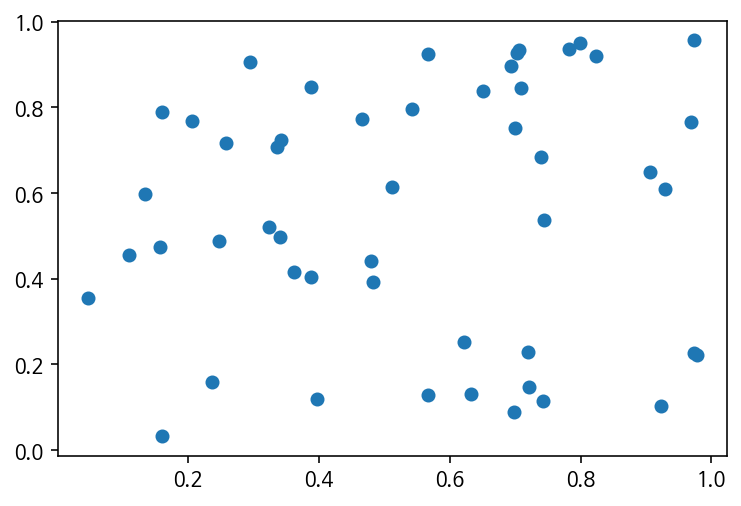

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(x, y)
plt.show

#### Pair Plot 그리기

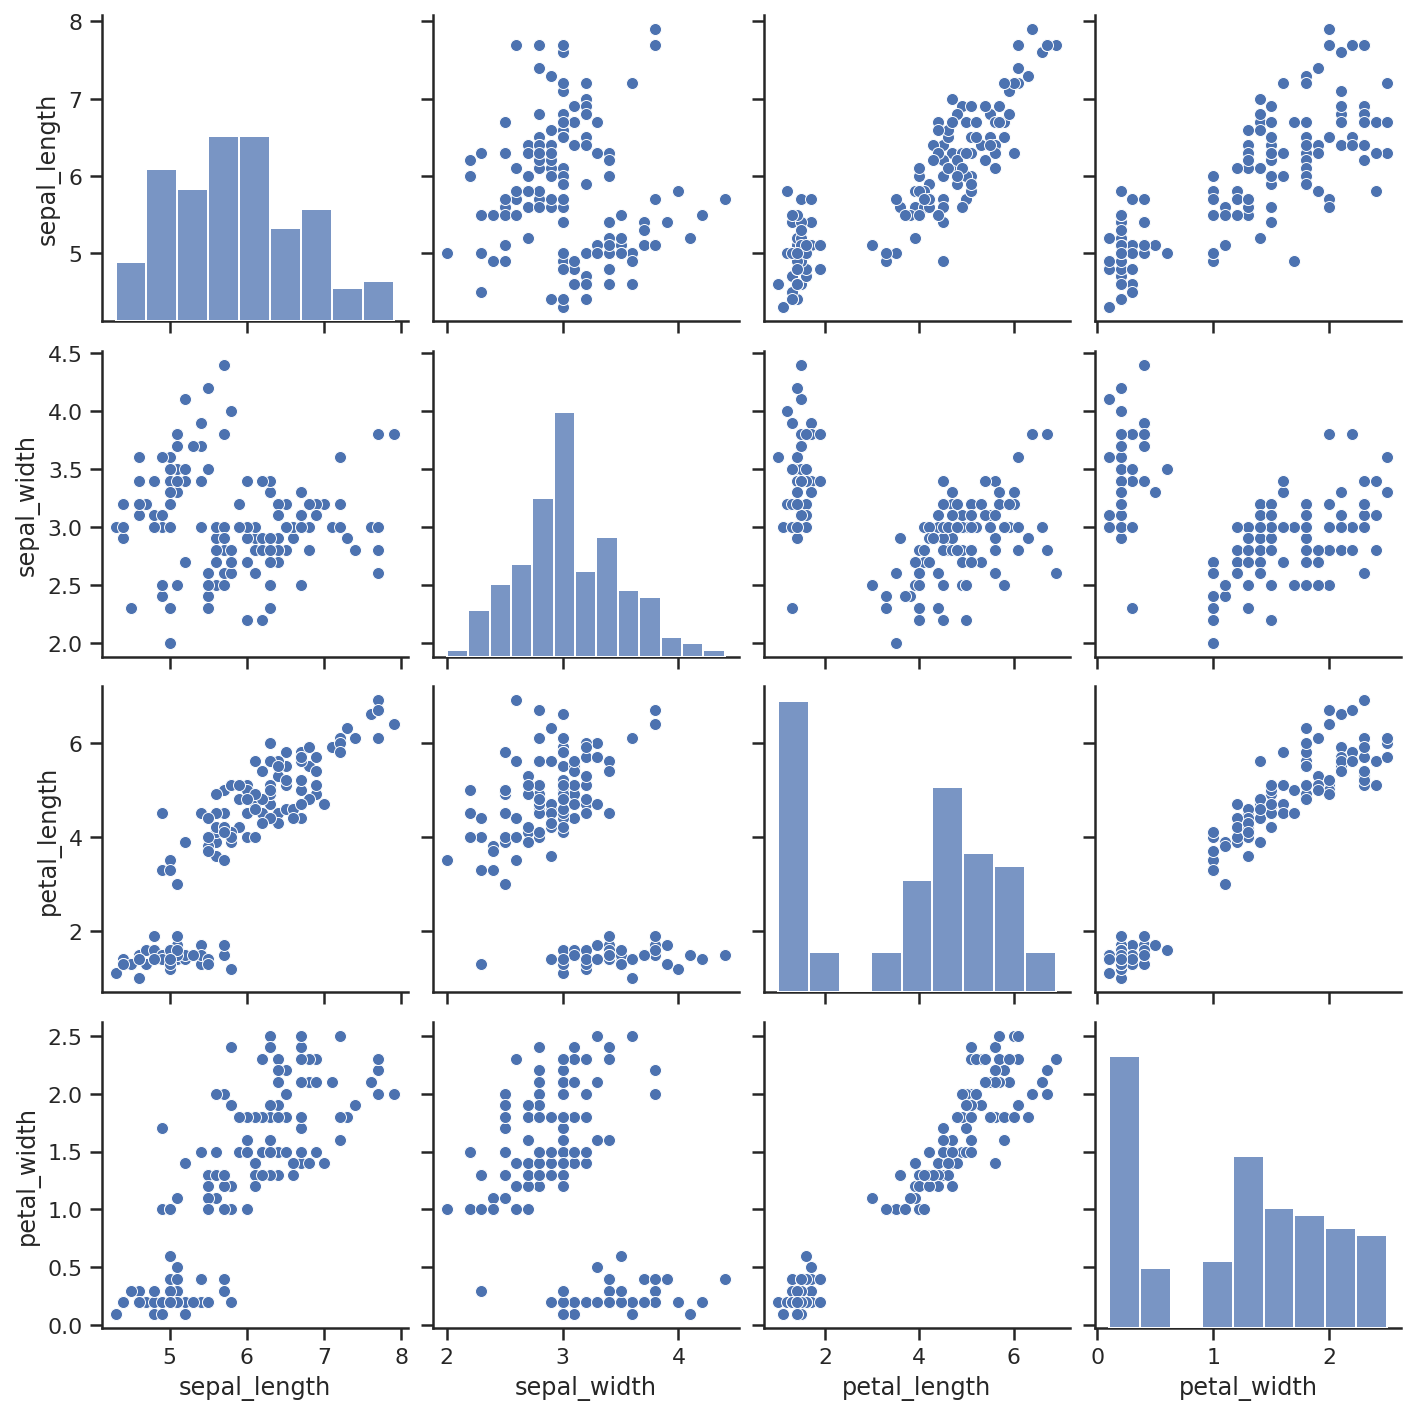

In [ ]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

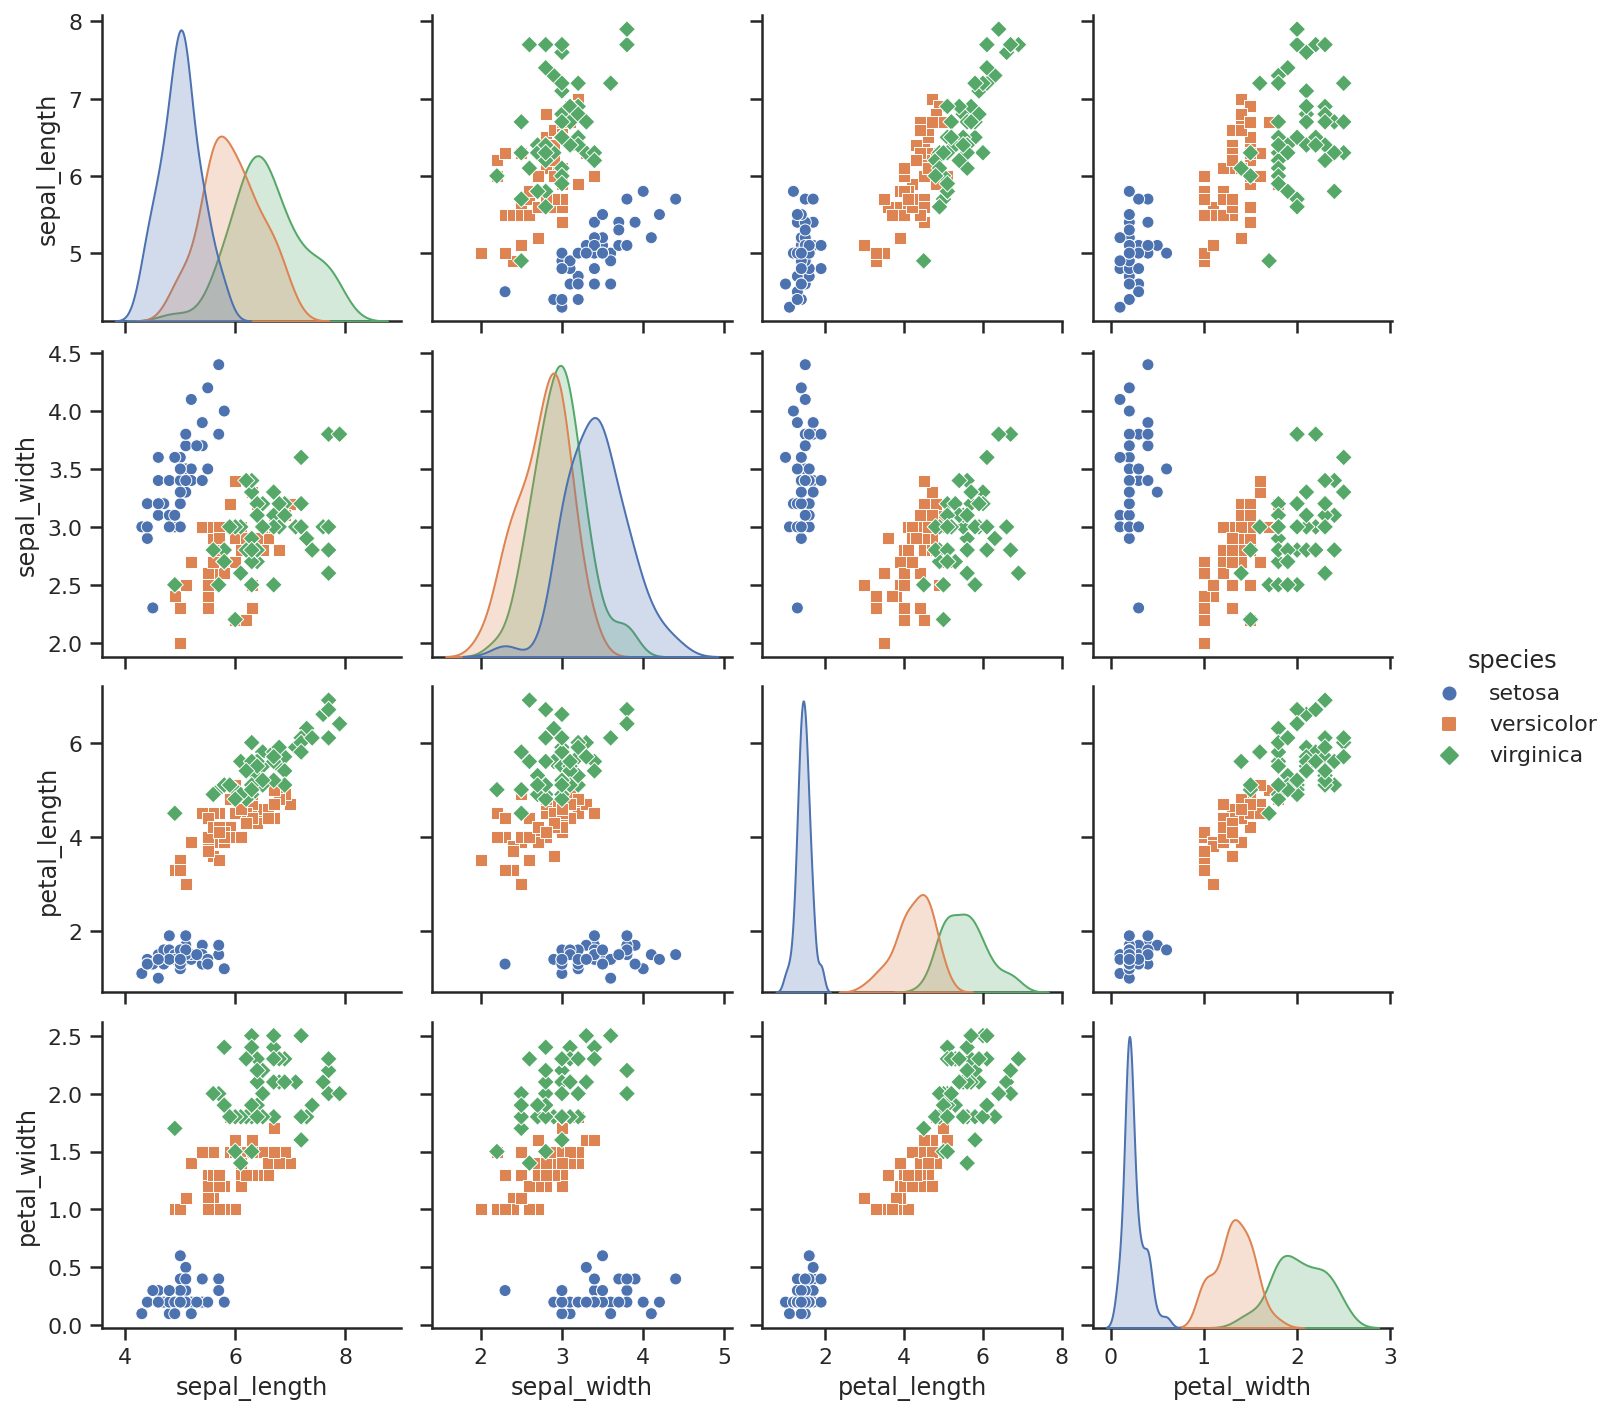

In [ ]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

#### 단일 변수 함수 그리기

<function matplotlib.pyplot.show>

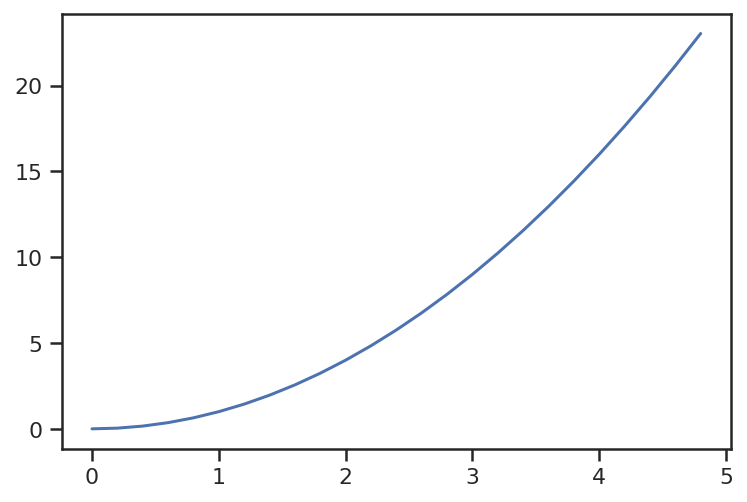

In [ ]:
x = np.arange(0., 5., 0.2)
y = x**2
plt.plot(x, y)
plt.show

#### 여러 그래프를 한 눈에 보기

<function matplotlib.pyplot.show>

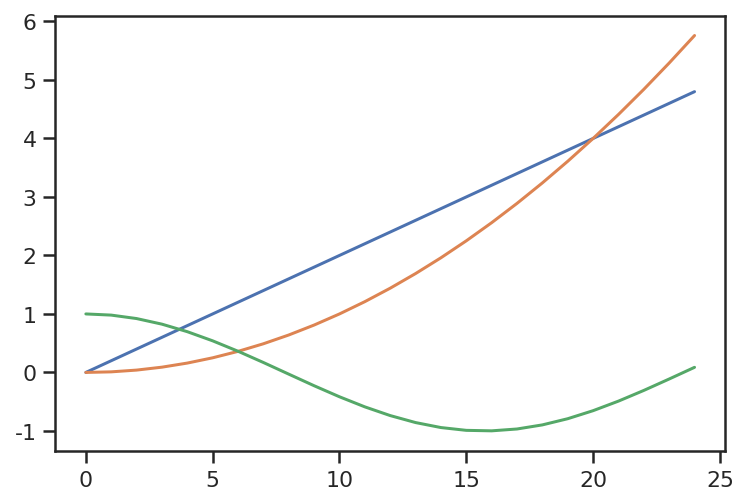

In [ ]:
x = np.arange(0., 5., 0.2)
y1 = x
y2 = 0.25 * x**2
y3 = np.cos(x)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.show

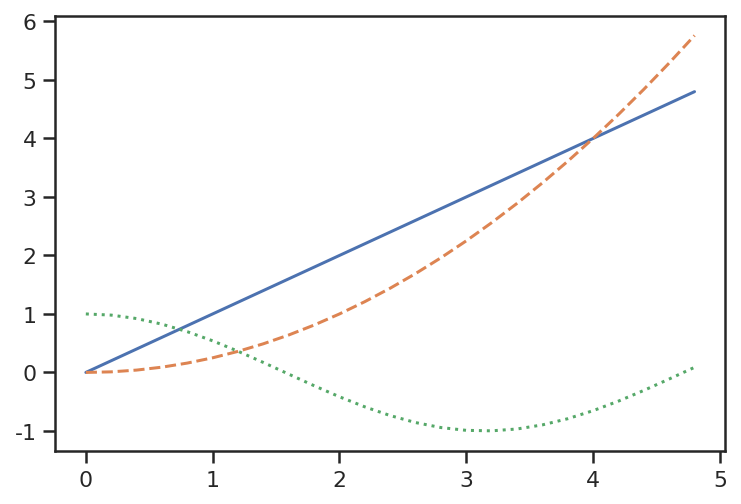

In [ ]:
plt.plot(x, y1, '-')
plt.plot(x, y2, '--')
plt.plot(x, y3, ':')
plt.show()

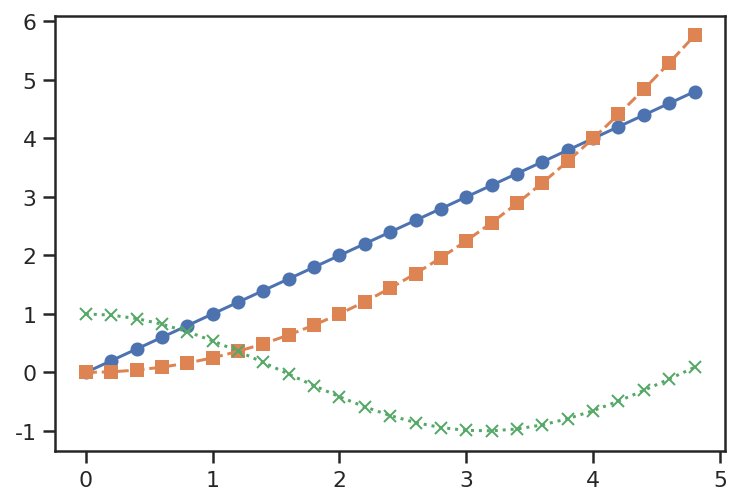

In [ ]:
plt.plot(x, y1, '-o')
plt.plot(x, y2, '--s')
plt.plot(x, y3, ':x')
plt.show()

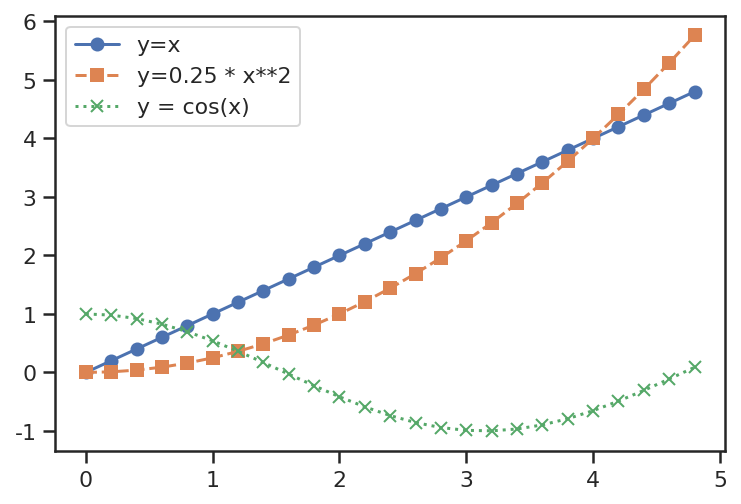

In [ ]:
plt.plot(x, y1, '-o')
plt.plot(x, y2, '--s')
plt.plot(x, y3, ':x')
plt.legend(['y=x', 'y=0.25 * x**2', 'y = cos(x)'])
plt.show()

#### 다변수 함수 그래프 그리기 -- 컨투어 이용

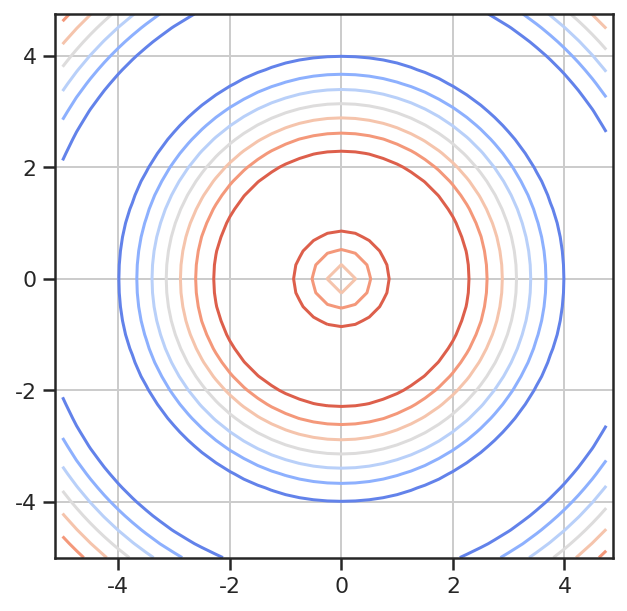

In [ ]:
import matplotlib.pyplot as plt

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, cmap = 'coolwarm')
plt.grid()
plt.axis('equal')
plt.show()

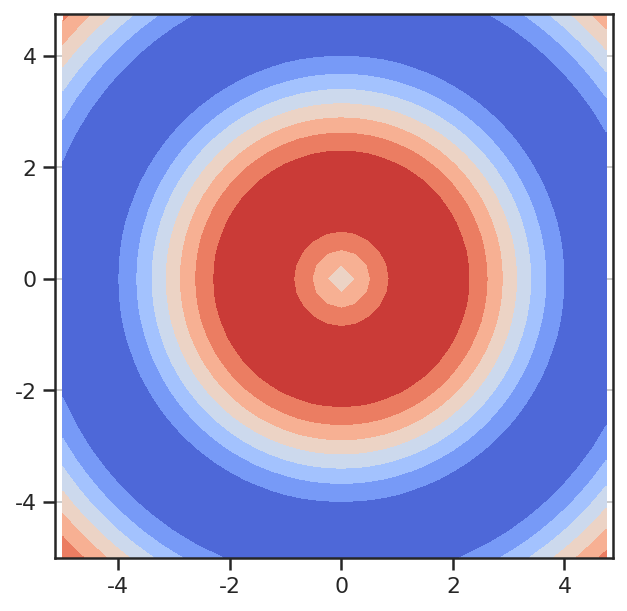

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.contourf(X, Y, Z, cmap = 'coolwarm')
plt.grid()
plt.axis('equal')
plt.show()

## Chapter 3

#### Tensorflow

#### 1.0이 아닌 2.0으로의 변화

In [ ]:
import numpy as np
import tensorflow as tf

hello_constant = tf.constant('Hello World')
print(hello_constant)

tf.Tensor(b'Hello World', shape=(), dtype=string)


##### 현재 Python에 적용되는 Tensorflow는 2.0이다. 그러나 Session은 1.0에서만 사용이 가능하다. 해당 책은 Session을 사용하였으므로 Tensorflow 1.0을 사용하는 것을 알 수 있다.

In [ ]:
#print(type(hello_constant))
#sess = tf.Session()
#output = sess.run(hello_constant)
#print(output)
#print(type(output))

굳이 사용한다면 아래에 덧불일 링크를 보고 참조하여라.
https://bbdata.tistory.com/2

#### 주요 사용할 3가지
##### Constant
##### Placeholder  -> 1.0 코드임. 2.0 사용불가
##### Variable

https://eclipse360.tistory.com/40

#### 2.0 Session 대체 코드

In [ ]:
# 1.0 Session

# import tensorflow as tf

# node1 = tf.constant(3.0)
# node2 = tf.constant(4.0)
# node3 = tf.add(node1, node2)

# sess = tf.Session()
# print(sess.run([node1, node2]))
# print(sess.run(node3))

In [ ]:
# 2.0 Session 대체 코드
import tensorflow as tf

node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

tf.print(node1, node2)
tf.print(node3)

3 4
7


#### 2.0 Placeholder 대체 코드

In [ ]:
# 1.0 Placeholder 코드
# import tensorflow as tf

# a = tf.placeholder(tf.float32)
# b = tf.placeholder(tf.float32)

# adder_node = a + b

# print(sess.run(adder_node, feed_dict={a:3, b:4, 5}))


In [ ]:
# 2.0 Placeholder 대체 코드
import tensorflow as tf
import numpy as np

@tf.function
def adder(a, b):
    return a + b

A = tf.constant(1)
B = tf.constant(2)
print(adder(A, B))

C = tf.constant([1, 2])
D = tf.constant([3, 4])
print(adder(C, D))

E = tf.constant([[1, 2, 3], [4, 5, 6]])
F = tf.constant([[2, 3, 4], [5, 6, 7]])
print(adder(E, F))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(
[[ 3  5  7]
 [ 9 11 13]], shape=(2, 3), dtype=int32)


#### Variable

##### Variable 1

In [ ]:
import tensorflow as tf
import numpy as np

v = tf.Variable([1, 2])
print(v)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>


In [ ]:
v.assign([3, 4])
print(v)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([3, 4], dtype=int32)>


In [ ]:
v.assign_add([10, 20])
print(v)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([13, 24], dtype=int32)>


##### Variable 2

In [ ]:
import tensorflow as tf
import numpy as np

v1 = tf.Variable(1., shape=tf.TensorShape(None))
print(v1)

<tf.Variable 'Variable:0' shape=<unknown> dtype=float32, numpy=1.0>


In [ ]:
v1.assign([[1.]])
print(v1)

<tf.Variable 'Variable:0' shape=<unknown> dtype=float32, numpy=array([[1.]], dtype=float32)>


##### 1.0 에서는 초기화를 해주었지만 2.0에서는 초기화가 따로 필요없다.

In [ ]:
v2 = tf.Variable([0, 1])
print(v2)
v2 = tf.Variable([1, 10])
print(v2)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([0, 1], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 1, 10], dtype=int32)>


#### 수학 연산

##### 기초 수학 연산

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant(10)
y = tf.constant(2)
z = x / y
w = z - 1
print(x)
print(y)
print(z)
print(w)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)


In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant(10)
y = tf.constant(2)

@tf.function
def sub(a, b):
    return a / b

def sub2(a):
    return a - 1 

z = sub(x, y)
w = sub2(z)
print(x)
print(y)
print(z)
print(w)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)


##### 텐서플로에 제공하는 다양한 함수

###### Square

$$y= x^2$$


In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant(4.0)
z = tf.square(x)

print(z)

tf.Tensor(16.0, shape=(), dtype=float32)


###### Pow
$$c = a^b$$

In [ ]:
x = tf.constant(4.0)
z = tf.pow(x, 3)

print(z)

tf.Tensor(64.0, shape=(), dtype=float32)


###### Squared Differnce

$$z = (x - y)^2$$

In [12]:
x = tf.constant(4.0)
y = tf.constant(1.0)
z = tf.math.squared_difference(x, y)
# 1.0 버젼의 경우 : tf.squared_difference()

print(z)

tf.Tensor(9.0, shape=(), dtype=float32)


###### Sqrt
$$z=\sqrt x$$

In [13]:
z = tf.constant(4.0)
x = tf.sqrt(z)
print(x)

tf.Tensor(2.0, shape=(), dtype=float32)


###### 다음은 
$$z= \sqrt [3] x = x^{\frac {1}{3}}$$

In [14]:
x = tf.constant(8.0)
z = tf.pow(x, 1.0/3.0)
print(z)

tf.Tensor(2.0, shape=(), dtype=float32)


###### Cos/Sin
$$y=\sin x$$
$$z=\cos x$$

In [16]:
x = tf.constant(np.pi/3.0)
y = tf.sin(x)
z = tf.cos(x)
print(y)
print(z)

tf.Tensor(0.86602545, shape=(), dtype=float32)
tf.Tensor(0.49999997, shape=(), dtype=float32)


###### Exp/Log
$$y=e^x$$
$$z=\ln x$$

In [18]:
x = tf.constant(1.0, dtype=tf.float32)
y = tf.exp(x)
z = tf.math.log(y)
print(y)
print(z)

tf.Tensor(2.7182817, shape=(), dtype=float32)
tf.Tensor(0.99999994, shape=(), dtype=float32)


##### 리덕션

###### Reduce_min/Reduce_max
$$y=min_{i=1, ..., N} x^i$$
$$z=max_{i=1, ..., N} x^i$$

In [19]:
x = tf.constant([1,2,3,4,5,6,7,8,9,10])
y = tf.reduce_min(x)
z = tf.reduce_max(x)
print(y)
print(z)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


###### Reduce_sum/Reduce_mean
$$y=\sum_{i=1}^N X_i$$
$$z=\frac{1}{N}\sum_{i=1}^N X_i$$

In [21]:
x = tf.constant([1,2,3,4,5,6,7,8,9,10], dtype=tf.float64)
y = tf.reduce_sum(x)
z = tf.reduce_mean(x)
print(y)
print(z)

tf.Tensor(55.0, shape=(), dtype=float64)
tf.Tensor(5.5, shape=(), dtype=float64)
